In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats as stats
import healpy as hp

In [2]:
sigmal=50
Ampl=1e-8
def Cell(ells):
    return Ampl*np.exp(-ells**2/(sigmal**2))

def Xi(theta):
    return Ampl*sigmal**2/(4*np.pi)*np.exp(-theta**2*sigmal**2/4)

In [3]:
Nside=128
Npix=12*Nside**2
ells=np.arange(3*Nside)
da=hp.synfast(Cell(ells),Nside)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


/Users/pecom/miniconda3/envs/astro/lib/python3.7/site-packages/healpy/sphtfunc.py:400: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,


In [6]:
(da**2).mean(), Xi(0)

(2.0601574577793596e-06, 1.9894367886486917e-06)

In [7]:
### MapXi
def MapXi(map,N=10000,dtheta=0.005):
    ## draw a subset of 
    ndx=np.random.choice(Npix,N)
    vals=map[ndx]
    vec=np.array(hp.pix2vec(Nside,ndx))
    Nb=int(2*np.pi/dtheta)+1
    xi=np.zeros(Nb)
    we=np.zeros(Nb)
    for i in range(N):
        dots=vec[0,:]*vec[0,i]+vec[1,:]*vec[1,i]+vec[2,:]*vec[2,i]
        dots[dots>1.0]=1.0
        dots[dots<-1.0]=-1.0
        distndx=(np.arccos(dots)/dtheta).astype('int')
        distndx[i]=0 ## sometimes buggy
        if (np.any(distndx<0)):
            k=np.where(distndx<0)[0]
            print (distndx[k],i,dots[k],'XXX')
        #print(distndx,dots)
        cvals=vals[i]*vals
        #print (cvals.shape,distndx.shape)
        #print (xi.dtype,np.bincount(distndx,weights=cvals,minlength=Nb).dtype)
        xi+=np.bincount(distndx,weights=cvals,minlength=Nb)
        we+=np.bincount(distndx,minlength=Nb)
    return np.arange(Nb)*dtheta, xi/we
        

In [11]:
r,xi=MapXi(da,50000)

/Users/pecom/miniconda3/envs/astro/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


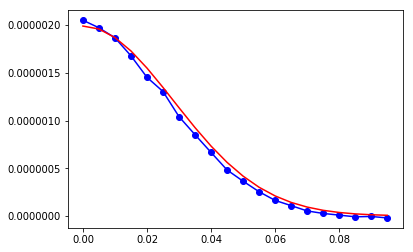

In [12]:
plt.plot(r[:20],xi[:20],'bo-')
plt.plot(r[:20],Xi(r[:20]),'r-')

8.05319300827294e-06